In [3]:
%load_ext autoreload
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
%autoreload 2

import sys,os,glob
import psutil

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import pandas as pd
from pprint import pprint

from matplotlib.colors import LogNorm
from matplotlib.gridspec import GridSpec
from matplotlib.patches import Rectangle
import cartopy.crs as ccrs
from datetime import datetime as dt

import datetime as dt
import re
import gc
import matplotlib.animation as animation
import warnings

# Own settings
from settings import *

workdir = os.getcwd()
moduledir, fcndir = defineDir(workdir)

Own modules available: ['conditionalstats', 'plot2D', 'plotCondPDFs', 'plot1D', 'conditionalstats_chunked']
Own modules available: ['fcns_load_DYAMOND_SAM', 'load_TOOCAN_DYAMOND_modif', 'load_TOOCAN_DYAMOND', 'load_TOOCAN_DYAMOND_modif_BF', 'casestudy', 'settings', 'fcns_load_RCEMIP_SAM', 'PrecipGrid']


In [5]:
from casestudy import *
from fcns_load_DYAMOND_SAM import *
from PrecipGrid import *

# Adapt class PrecipGrid()

## 1. create case study

In [6]:
region = 'tropics'
varid = 'Prec'
mask = 'all'

In [7]:
cs_tropics = CaseStudy(name='DYAMOND-SAM',
                      region=region,
                      rel_tab_dyam_seg=loadRelTable('DYAMOND_SEG'))

In [8]:
# move first index from 832 (all precip available) to 832+29 to start a new day

# define case study
cs_tropics.setSimulationSpecs(i_t_min = 832+29,
                              i_t_max = 1917,
                              lat_slice=slice(-30,30),
                              lon_slice=slice(None))

# where sliced distributions are stored
cs_tropics.setDirectories(varid,mask)

# load all distributions
cs_tropics.loadDistSliced(varid,mask)

# compute mean precip time series
cs_tropics.computeMean(varid='Prec',mask='all')

# find "missing" time indices
cs_tropics.findTimeIndToIgnore()

In [9]:
print('time indices to ignore:')
print(cs_tropics.times_to_ignore)

time indices to ignore:
[ 862  863  958  959 1054 1055 1150 1151 1246 1247 1342 1343 1438 1439
 1534 1535 1630 1631 1726 1727 1822 1823]


## 2. adapt and test PrecipGrid()

In [9]:
# Initialize
grid = PrecipGrid(casestudy=cs_tropics,verbose_steps=True,overwrite=False)

In [10]:
# print(grid)
# check number of slices per day remaining
print('day: (#t) t_i-t_f')
for day,ind in zip(grid.days,grid.index_per_days):
    print('%s: (%d) %d-%d'%(day,len(ind), ind[0], ind[-1]))

print(grid.n_days,'days')

day: (#t) t_i-t_f
08-19: (46) 861-906
08-20: (48) 907-954
08-21: (46) 955-1000
08-22: (48) 1001-1048
08-23: (46) 1049-1094
08-24: (48) 1095-1142
08-25: (46) 1143-1188
08-26: (48) 1189-1236
08-27: (46) 1237-1282
08-28: (48) 1283-1330
08-29: (46) 1331-1376
08-30: (48) 1377-1424
08-31: (46) 1425-1470
09-01: (48) 1471-1518
09-02: (46) 1519-1564
09-03: (48) 1565-1612
09-04: (46) 1613-1658
09-05: (48) 1659-1706
09-06: (46) 1707-1752
09-07: (48) 1753-1800
09-08: (46) 1801-1846
09-09: (48) 1847-1894
22 days


In [11]:
%%time

# prepare data ## TAKES A LOOONG TIME
grid.prepare_data()

/data/bfildier/DYAMOND_REGIONS/tropics/SAM/regridded/grid.pickle
importing and copying grid.pickle
CPU times: user 9.69 ms, sys: 242 ms, total: 252 ms
Wall time: 2.32 s


In [32]:
if grid.overwrite:
    # remove existing grid
    grid.removeOldFile('grid.pickle')
    # saved prepared grid
    grid.pickleSelf('grid.pickle') # do not forget to remove attributes of type xarray  

In [33]:
# compute surface
grid.compute()

In [34]:
# show content
print(grid.ds)

<xarray.Dataset>
Dimensions:            (days: 22, lat: 1554, lat_global: 60, lon: 9216, lon_global: 360)
Coordinates:
  * lat                (lat) float32 -30.0 -29.96 -29.92 ... 29.92 29.96 30.0
  * lon                (lon) float32 0.01953 0.05859 0.09766 ... 359.9 360.0
  * lat_global         (lat_global) int64 0 1 2 3 4 5 6 ... 53 54 55 56 57 58 59
  * lon_global         (lon_global) int64 0 1 2 3 4 5 ... 355 356 357 358 359
  * days               (days) int64 0 1 2 3 4 5 6 7 ... 14 15 16 17 18 19 20 21
Data variables:
    pixel_surf         (lat, lon) float64 ...
    global_pixel_surf  (lat_global, lon_global) float64 ...


In [16]:
grid.index_per_days[0][0], grid.df.path_dyamond[0]

(861, 'DYAMOND_9216x4608x74_7.5s_4km_4608_0000000720')

In [22]:
%%time 

day0 = 0
dayf = 21

# try to regrid
grid.saveMeanPrecip(day0=day0,dayf=dayf)

mean_prec not computed...
computing mean_prec for day 0, 08-19...
/data/bfildier/DYAMOND_REGIONS/tropics/SAM/regridded/mean_Prec/day_08-19.pkl already exists
computing mean_prec for day 1, 08-20...
/data/bfildier/DYAMOND_REGIONS/tropics/SAM/regridded/mean_Prec/day_08-20.pkl already exists
computing mean_prec for day 2, 08-21...
/data/bfildier/DYAMOND_REGIONS/tropics/SAM/regridded/mean_Prec/day_08-21.pkl already exists
computing mean_prec for day 3, 08-22...
/data/bfildier/DYAMOND_REGIONS/tropics/SAM/regridded/mean_Prec/day_08-22.pkl already exists
computing mean_prec for day 4, 08-23...
/data/bfildier/DYAMOND_REGIONS/tropics/SAM/regridded/mean_Prec/day_08-23.pkl already exists
computing mean_prec for day 5, 08-24...
/data/bfildier/DYAMOND_REGIONS/tropics/SAM/regridded/mean_Prec/day_08-24.pkl already exists
computing mean_prec for day 6, 08-25...
/data/bfildier/DYAMOND_REGIONS/tropics/SAM/regridded/mean_Prec/day_08-25.pkl already exists
computing mean_prec for day 7, 08-26...
/data/bfil

In [24]:
%%time 

day0 = 0
dayf = 21

# try to regrid
grid.saveMaxPrecip(day0=day0,dayf=dayf)

max_prec not computed...
computing max_prec for day 0, 08-19...
/data/bfildier/DYAMOND_REGIONS/tropics/SAM/regridded/max_Prec/day_08-19.pkl already exists
computing max_prec for day 1, 08-20...
/data/bfildier/DYAMOND_REGIONS/tropics/SAM/regridded/max_Prec/day_08-20.pkl already exists
computing max_prec for day 2, 08-21...
/data/bfildier/DYAMOND_REGIONS/tropics/SAM/regridded/max_Prec/day_08-21.pkl already exists
computing max_prec for day 3, 08-22...
/data/bfildier/DYAMOND_REGIONS/tropics/SAM/regridded/max_Prec/day_08-22.pkl already exists
computing max_prec for day 4, 08-23...
/data/bfildier/DYAMOND_REGIONS/tropics/SAM/regridded/max_Prec/day_08-23.pkl already exists
computing max_prec for day 5, 08-24...
/data/bfildier/DYAMOND_REGIONS/tropics/SAM/regridded/max_Prec/day_08-24.pkl already exists
computing max_prec for day 6, 08-25...
/data/bfildier/DYAMOND_REGIONS/tropics/SAM/regridded/max_Prec/day_08-25.pkl already exists
computing max_prec for day 7, 08-26...
/data/bfildier/DYAMOND_REG

# Test PrecipGrid for another variable

In [42]:
# Initialize
grid = PrecipGrid(casestudy=cs_tropics,verbose_steps=True,overwrite=False)

In [43]:
%%time

# prepare data ## TAKES A LOOONG TIME
grid.prepare_data()

/data/bfildier/DYAMOND_REGIONS/tropics/SAM/regridded/grid.pickle
importing and copying grid.pickle
CPU times: user 219 ms, sys: 248 ms, total: 467 ms
Wall time: 1.54 s


In [44]:
print(grid.ds)

<xarray.Dataset>
Dimensions:            (days: 22, lat: 1554, lat_global: 60, lon: 9216, lon_global: 360)
Coordinates:
  * lat                (lat) float32 -30.0 -29.96 -29.92 ... 29.92 29.96 30.0
  * lon                (lon) float32 0.01953 0.05859 0.09766 ... 359.9 360.0
  * lat_global         (lat_global) int64 0 1 2 3 4 5 6 ... 53 54 55 56 57 58 59
  * lon_global         (lon_global) int64 0 1 2 3 4 5 ... 355 356 357 358 359
  * days               (days) int64 0 1 2 3 4 5 6 7 ... 14 15 16 17 18 19 20 21
Data variables:
    pixel_surf         (lat, lon) float64 ...
    global_pixel_surf  (lat_global, lon_global) float64 ...
    mean_prec          (lat_global, lon_global, days) float64 ...
    max_prec           (lat_global, lon_global, days) float64 ...


In [45]:
# compute surface
grid.compute()

In [46]:
print(grid.ds)

<xarray.Dataset>
Dimensions:            (days: 22, lat: 1554, lat_global: 60, lon: 9216, lon_global: 360)
Coordinates:
  * lat                (lat) float32 -30.0 -29.96 -29.92 ... 29.92 29.96 30.0
  * lon                (lon) float32 0.01953 0.05859 0.09766 ... 359.9 360.0
  * lat_global         (lat_global) int64 0 1 2 3 4 5 6 ... 53 54 55 56 57 58 59
  * lon_global         (lon_global) int64 0 1 2 3 4 5 ... 355 356 357 358 359
  * days               (days) int64 0 1 2 3 4 5 6 7 ... 14 15 16 17 18 19 20 21
Data variables:
    pixel_surf         (lat, lon) float64 ...
    global_pixel_surf  (lat_global, lon_global) float64 ...


In [55]:
if grid.overwrite:
    # remove existing grid
    grid.removeOldFile('grid.pickle')
    # saved prepared grid
    grid.pickleSelf('grid.pickle') # do not forget to remove attributes of type xarray  

In [16]:
varid = 'U10m'
day0 = 11
dayf = 11

grid.saveVarRegridded(day0,dayf,varid,func='mean')

mean_U10m not computed...
computing mean_U10m for day 11, 08-30...
/data/bfildier/DYAMOND_REGIONS/tropics/SAM/regridded/mean_U10m/day_08-30.pkl already exists
remove old file on disk
save...


In [21]:
grid.ds

<xarray.Dataset>
Dimensions:            (days: 22, lat: 1554, lat_global: 60, lon: 9216, lon_global: 360)
Coordinates:
  * days               (days) int64 0 1 2 3 4 5 6 7 ... 14 15 16 17 18 19 20 21
  * lat                (lat) float32 -30.0 -29.96 -29.92 ... 29.92 29.96 30.0
  * lon                (lon) float32 0.01953 0.05859 0.09766 ... 359.9 360.0
  * lat_global         (lat_global) int64 0 1 2 3 4 5 6 ... 53 54 55 56 57 58 59
  * lon_global         (lon_global) int64 0 1 2 3 4 5 ... 355 356 357 358 359
Data variables:
    pixel_surf         (lat, lon) float64 ...
    global_pixel_surf  (lat_global, lon_global) float64 1.181e+04 ... 1.181e+04
    mean_prec          (lat_global, lon_global, days) float64 ...
    max_prec           (lat_global, lon_global, days) float64 ...
    mean_U10m          (lat_global, lon_global, days) float64 nan nan ... nan

In [23]:
grid.ds.drop_vars('mean_prec').drop_vars('max_prec')

<xarray.Dataset>
Dimensions:            (days: 22, lat: 1554, lat_global: 60, lon: 9216, lon_global: 360)
Coordinates:
  * days               (days) int64 0 1 2 3 4 5 6 7 ... 14 15 16 17 18 19 20 21
  * lat                (lat) float32 -30.0 -29.96 -29.92 ... 29.92 29.96 30.0
  * lon                (lon) float32 0.01953 0.05859 0.09766 ... 359.9 360.0
  * lat_global         (lat_global) int64 0 1 2 3 4 5 6 ... 53 54 55 56 57 58 59
  * lon_global         (lon_global) int64 0 1 2 3 4 5 ... 355 356 357 358 359
Data variables:
    pixel_surf         (lat, lon) float64 ...
    global_pixel_surf  (lat_global, lon_global) float64 1.181e+04 ... 1.181e+04
    mean_U10m          (lat_global, lon_global, days) float64 nan nan ... nan

In [85]:
varid = 'LLS'
day0 = 11
dayf = 11

grid.saveVarRegridded(day0,dayf,varid,func='mean')

mean_LLS not computed...
computing mean_LLS for day 11, 08-30...
/data/bfildier/DYAMOND_REGIONS/tropics/SAM/diagnostics_2D/DYAMOND_9216x4608x74_7.5s_4km_4608_0000334080_LLS.nc
/data/bfildier/DYAMOND_REGIONS/tropics/SAM/diagnostics_2D/DYAMOND_9216x4608x74_7.5s_4km_4608_0000334320_LLS.nc
regrid nans
/data/bfildier/DYAMOND_REGIONS/tropics/SAM/diagnostics_2D/DYAMOND_9216x4608x74_7.5s_4km_4608_0000334560_LLS.nc
regrid nans
/data/bfildier/DYAMOND_REGIONS/tropics/SAM/diagnostics_2D/DYAMOND_9216x4608x74_7.5s_4km_4608_0000334800_LLS.nc
regrid nans
/data/bfildier/DYAMOND_REGIONS/tropics/SAM/diagnostics_2D/DYAMOND_9216x4608x74_7.5s_4km_4608_0000335040_LLS.nc
regrid nans
/data/bfildier/DYAMOND_REGIONS/tropics/SAM/diagnostics_2D/DYAMOND_9216x4608x74_7.5s_4km_4608_0000335280_LLS.nc
regrid nans
/data/bfildier/DYAMOND_REGIONS/tropics/SAM/diagnostics_2D/DYAMOND_9216x4608x74_7.5s_4km_4608_0000335520_LLS.nc
/data/bfildier/DYAMOND_REGIONS/tropics/SAM/diagnostics_2D/DYAMOND_9216x4608x74_7.5s_4km_4608_00003

min,max = 0.0 3.0000002
0.00018908417345917346


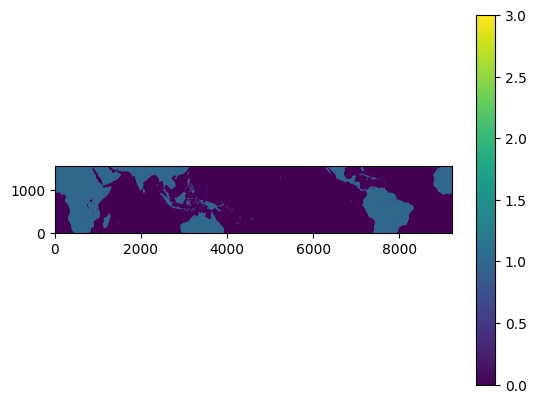

In [47]:
varid = 'LANDMASK'
day0 = 11
dayf = 11

idx = grid.index_per_days[day0][0]
var_current = grid.loadVar(idx,grid.df,varid=varid)

var_min = np.nanmin(var_current)
var_max = np.nanmax(var_current)
print('min,max =',var_min,var_max)
print(np.sum(var_current>1.1).values/np.size(var_current))

plt.imshow(var_current,origin='lower')
plt.colorbar()

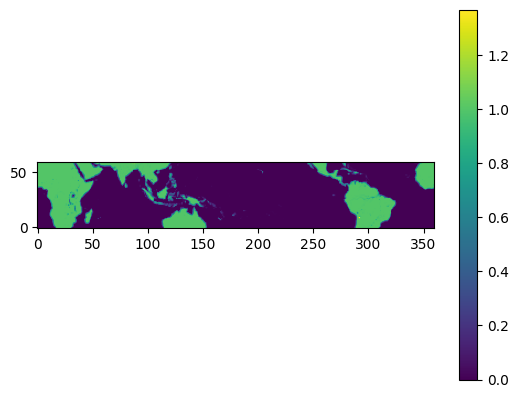

In [48]:

var_regrid_idx = grid.spatial_mean_data_from_center_to_global(var_current)

plt.imshow(var_regrid_idx,origin='lower')
plt.colorbar()

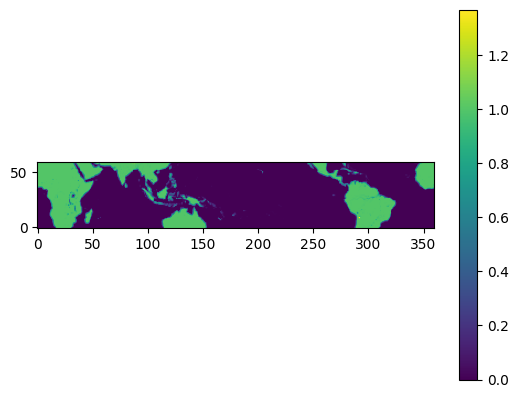

In [50]:
varid = 'LANDMASK'
day0 = 11
dayf = 11

landmask = grid.regrid_by_day(day0,varid=varid,func='mean')

plt.imshow(landmask[:,:,0],origin='lower')
plt.colorbar()

# New dev: class Grid(), redesigned from PrecipGrid()

Redefine class Grid() using Maxime's PrecipGrid development.

For a region of interest (lat_slice, lon_slice), a Grid class constructor does the following:

    (1) computes (or loads if precomputed) a fixed coarsened grid
    (2) stores specific attributes from a CaseStudy object (region, directories)

Grid has methods to:

    (2) load DYAMOND data for 1 day (48 time steps) specified in argument
    (3) coarsen the data, or apply a function onto the coarser grid
    (4) save the data on the new grid for this single day
    (5) delete the loaded data with gc

In [ ]:
# class Grid():
    
#     # def create_day_dim(self):
#     #     self.n_days = len(self.index_per_days)
#     #     if type(self.n_days) is not int:
#     #         raise ValueError('number of days is not an integer')
#     #     self.days_dim = self.ds.expand_dims('days', None)
#     #     self.days_values = np.arange(self.n_days)
#     #     self.ds['days'] = xr.DataArray(np.arange(self.n_days), dims = ['days']) 

# ##---- Class constructor

#     def __init__(self, verbose = False, name = 'DYAMOND', region = '130E_165E_0N_20N', sim = 'SAM'):
#         self.name = name
#         self.region = region
#         self.sim = sim
#         self.path = '/scratchu/bfildier/'+self.name+'_REGIONS/'+self.region+'/'+self.sim+'/'
#         self.path_data2d = self.path + '2D/' ## goesfrom 4608_0000000240 to 4608_0000460800
#         self.data_names = ['CWP', 'LHF', 'OM500', 'OM850', 'Precac', 'PSFC', 'PW', 'RH500', 'SHF', 'T2mm', 'U10m', 'V10m']
#         self.path_safeguard = '/homedata/mcarenso/Stage2023/'+self.name+'_REGIONS/'+self.region+'/'+self.sim+'/'
#         self.verbose = verbose
#         self.df = self.loadRelTable()
        
#         # could be a function to work around the dataframe with original data
#         if self.sim == 'SAM':
#             self.indexes_to_ignore = [862,  863,  958,  959, 1054, 1055, 1150, 1151, 1246, 1247, 1342, 1343, 1438, 1439, 1534, 1535, 1630, 1631, 1726, 1727, 1822, 1823]
#             self.df = self.df.drop(self.indexes_to_ignore).reset_index(drop=True)
#             self.n_first_data_incomplete = sum(1-self.df["path_dyamond"].str.split(".").apply(lambda x : int(x[1][-7:-1]) >= 30000))
#             self.df = self.df[self.df["path_dyamond"].str.split(".").apply(lambda x : int(x[1][-7:-1]) >= 30000)].reset_index(drop=True)
#             self.index_per_days = [list(group.index) for _, group in self.df.groupby(['month', 'day'])]
#             self.index_per_days.remove(self.index_per_days[-1])# last day empty
#             self.n_days = len(self.index_per_days)

# ##---- Methods


    
# ##---- Required functions
    
#     def build_xarray(self):
        
#         da = xr.DataArray(self.pixel_surface, dims = ['lat', 'lon'], coords = {'lat': self.lat_centers, 'lon': self.lon_centers})
        
#         self.global_pixel_surface = self.sum_data_from_center_to_global(self.pixel_surface)

#         da_global = xr.DataArray(self.global_pixel_surface, dims = ['lat_global', 'lon_global'], coords = {'lat_global': self.lat_global, 'lon_global': self.lon_global})
        
#         ds = xr.Dataset({'pixel_surf': da, 'global_pixel_surf': da_global})
                
#         return ds

#     def __get_i_and_alpha_lat__(self):
#         i_min, i_max = np.zeros((self.n_lat, self.n_lon)), np.zeros((self.n_lat, self.n_lon))
#         alpha_i_min, alpha_i_max = np.ones((self.n_lat, self.n_lon)), np.ones((self.n_lat, self.n_lon))

#         for i_lat, cum_length in enumerate(self.cumsum_lat_area):
#             border_left = cum_length - self.lat_area[i_lat]
#             border_right = cum_length
            
#             for i in range(self.n_lat):
#                 cum_global_length = (i+1)*self.global_lat_area
                
#                 if cum_global_length > border_left and ((cum_global_length < border_right) or (math.isclose(cum_global_length, border_right))):
#                     bottom_contrib = (cum_global_length - border_left)/self.lat_area[i_lat]
#                     top_contrib = (border_right - cum_global_length)/self.lat_area[i_lat]           
#                     if self.verbose : print('local', i_lat, cum_length,'global',  i, cum_global_length,'borders',  border_left, border_right, 'contribs', bottom_contrib, top_contrib)
#                     if i != self.n_lat-1:
#                         i_min[i+1, :] = i_lat
#                         alpha_i_min[i+1, :] = top_contrib if not (math.isclose(cum_global_length, border_right)) else 0
                    

#                     i_max[i, :] = i_lat
#                     alpha_i_max[i, :] = bottom_contrib if not (math.isclose(cum_global_length, border_right)) else 1
                    
#         return i_min, i_max, alpha_i_min, alpha_i_max

#     def __get_j_and_alpha_lon__(self):
#         j_min, j_max = np.zeros((self.n_lat, self.n_lon)), np.zeros((self.n_lat, self.n_lon))
#         alpha_j_min, alpha_j_max = np.ones((self.n_lat, self.n_lon)), np.ones((self.n_lat, self.n_lon))
#         for i in range(self.n_lat):
#             cumsum_area_by_lon = self.cumsum_area_by_lon_and_global_lat[i, :]
#             for j_lon, cum_length in enumerate(cumsum_area_by_lon):
#                 border_left = cum_length - self.area_by_lon_and_global_lat[i, j_lon]
#                 border_right = cum_length
                
#                 for j in range(self.n_lon):
#                     cum_global_length = (j+1)*self.global_area
                    
#                     if cum_global_length > border_left  and ((cum_global_length) < border_right or (math.isclose(cum_global_length, border_right))):

#                         left_contrib = (cum_global_length - border_left)/self.area_by_lon_and_global_lat[i, j_lon]
#                         right_contrib = (border_right - cum_global_length)/self.area_by_lon_and_global_lat[i, j_lon]
#                         if self.verbose : print('local', j_lon, cum_length,'global',  j, cum_global_length,'borders',  border_left, border_right, 'contribs', left_contrib, right_contrib)
#                         if j!= self.n_lon-1:
#                             j_min[i, j+1] = j_lon
#                             alpha_j_min[i, j+1] = right_contrib if not (math.isclose(cum_global_length, border_right)) else 0
                            
#                         j_max[i, j] = j_lon
#                         alpha_j_max[i, j] = left_contrib if not (math.isclose(cum_global_length, border_right)) else 1
    
#         return j_min, j_max, alpha_j_min, alpha_j_max    
     
#     def __build_slices_j_lon__(self):
#         slices_j_lon = np.empty((self.n_lat, self.n_lon), dtype=object)
#         for i in range(self.n_lat):
#             for j in range(self.n_lon):
#                 slices_j_lon[i, j] = slice(int(self.j_min[i, j])+1, int(self.j_max[i, j])) 
#         return slices_j_lon
    
#     def _compute_area_by_lon_(self):
#             area_by_lon = np.zeros((self.n_lat, self.lon_centers.shape[0]))
#             for j_lon in range(self.lon_centers.shape[0]):
#                 for i, slice_i_lat in enumerate(self.slices_i_lat):
#                     i_min = self.i_min[i, :]
#                     i_min = self.check_all_values_same(i_min)
#                     i_max = self.i_max[i, :]
#                     i_max = self.check_all_values_same(i_max)
#                     alpha_i_min = self.alpha_i_min[i, :]
#                     alpha_i_min = self.check_all_values_same(alpha_i_min)
#                     alpha_i_max = self.alpha_i_max[i, :]
#                     alpha_i_max = self.check_all_values_same(alpha_i_max)
                
#                     ## print i_min, i_max, alpha_i_min, alpha_i_max
#                     if self.verbose : print(i, i_min, i_max, alpha_i_min, alpha_i_max)
#                     bottom_sum = self.pixel_surface[i_min,j_lon]*alpha_i_min
#                     if self.verbose : print(bottom_sum)
#                     top_sum = self.pixel_surface[i_max,j_lon]*alpha_i_max
#                     if self.verbose : print(top_sum)
#                     mid_sum = np.sum(self.pixel_surface[slice_i_lat, j_lon])
#                     if self.verbose : print(mid_sum)
#                     area_by_lon[i, j_lon] = mid_sum+bottom_sum+top_sum
#                     #print everything 
#                     if False : print('i', i, 'j_lon', j_lon, 'i_min', i_min, 'i_max', i_max, 'slice_i_lat', slice_i_lat, 'alpha_i_min', alpha_i_min, 'alpha_i_max', alpha_i_max, 'bottom_sum', bottom_sum, 'top_sum', top_sum, 'mid_sum', mid_sum, 'area_by_lon', area_by_lon[i, j_lon])
            
#             return area_by_lon

#     def sum_data_from_center_to_global(self, data_on_center):
#         x = data_on_center
#         X = np.zeros((self.n_lat, self.n_lon))
#         for i, slice_i_lat in enumerate(self.slices_i_lat):
#             for j, slice_j_lon in enumerate(self.slices_j_lon[i]):
#                 if self.verbose : print(slice_i_lat, slice_j_lon)
#                 mid_sum = np.sum(x[slice_i_lat, slice_j_lon])
#                 bottom_sum = np.sum( x[self.i_min[i,j], slice_j_lon]*self.alpha_i_min[i,j])
#                 top_sum = np.sum( x[self.i_max[i,j], slice_j_lon]*self.alpha_i_max[i,j])
#                 left_sum = np.sum( x[slice_i_lat, self.j_min[i,j]]*self.alpha_j_min[i,j])
#                 right_sum = np.sum( x[slice_i_lat, self.j_max[i,j]]*self.alpha_j_max[i,j])
#                 bottom_left_corner = x[self.i_min[i,j], self.j_min[i,j]]*self.alpha_j_min[i,j]*self.alpha_i_min[i,j]
#                 bottom_right_corner = x[self.i_min[i,j], self.j_max[i,j]]*self.alpha_j_max[i,j]*self.alpha_i_min[i,j]
#                 top_left_corner = x[self.i_max[i,j], self.j_min[i,j]]*self.alpha_j_min[i,j]*self.alpha_i_max[i,j]
#                 top_right_corner = x[self.i_max[i,j], self.j_max[i,j]]*self.alpha_j_max[i,j]*self.alpha_i_max[i,j]
#                 X[i, j] = mid_sum+bottom_sum+top_sum+left_sum+right_sum+bottom_left_corner+bottom_right_corner+top_left_corner+top_right_corner
#         return X
    
#     def spatial_mean_data_from_center_to_global(self, data_on_center):
#         x = data_on_center*self.pixel_surface
#         X = np.zeros((self.n_lat, self.n_lon))
#         for i, slice_i_lat in enumerate(self.slices_i_lat):
#             for j, slice_j_lon in enumerate(self.slices_j_lon[i]):
#                 if self.verbose : print(slice_i_lat, slice_j_lon)
#                 mid_sum = np.sum(x[slice_i_lat, slice_j_lon])
#                 bottom_sum = np.sum( x[self.i_min[i,j], slice_j_lon]*self.alpha_i_min[i,j])
#                 top_sum = np.sum( x[self.i_max[i,j], slice_j_lon]*self.alpha_i_max[i,j])
#                 left_sum = np.sum( x[slice_i_lat, self.j_min[i,j]]*self.alpha_j_min[i,j])
#                 right_sum = np.sum( x[slice_i_lat, self.j_max[i,j]]*self.alpha_j_max[i,j])
#                 bottom_left_corner = x[self.i_min[i,j], self.j_min[i,j]]*self.alpha_j_min[i,j]*self.alpha_i_min[i,j]
#                 bottom_right_corner = x[self.i_min[i,j], self.j_max[i,j]]*self.alpha_j_max[i,j]*self.alpha_i_min[i,j]
#                 top_left_corner = x[self.i_max[i,j], self.j_min[i,j]]*self.alpha_j_min[i,j]*self.alpha_i_max[i,j]
#                 top_right_corner = x[self.i_max[i,j], self.j_max[i,j]]*self.alpha_j_max[i,j]*self.alpha_i_max[i,j]

#                 X[i, j] = mid_sum+bottom_sum+top_sum+left_sum+right_sum+bottom_left_corner+bottom_right_corner+top_left_corner+top_right_corner

#         return X/self.grid_surface         
    
#     def spatial_max_data_from_center_to_global(self, data_on_center):
#         x = data_on_center
#         X = np.zeros((self.n_lat, self.n_lon))
#         alpha_max = self.__build_alpha_max__()
#         for i, slice_i_lat in enumerate(self.slices_i_lat):
#             for j, slice_j_lon in enumerate(self.slices_j_lon[i]):
#                 if self.verbose : print(slice_i_lat, slice_j_lon)
#                 m = x[slice_i_lat, slice_j_lon].values.flatten()
#                 b = (x[self.i_min[i,j], slice_j_lon]*alpha_max[self.i_min[i,j], slice_j_lon]).values.flatten()
#                 t = (x[self.i_max[i,j], slice_j_lon]*self.alpha_max[self.i_max[i,j], slice_j_lon]).values.flatten()
#                 l = (x[slice_i_lat, self.j_min[i,j]]*self.alpha_max[slice_i_lat, self.j_min[i,j]]).values.flatten()
#                 r = (x[slice_i_lat, self.j_max[i,j]]*self.alpha_max[slice_i_lat, self.j_max[i,j]]).values.flatten()
#                 blc = (x[self.i_min[i,j], self.j_min[i,j]]*self.alpha_max[self.i_min[i,j], self.j_min[i,j]]).values.flatten()
#                 btc = (x[self.i_min[i,j], self.j_max[i,j]]*self.alpha_max[self.i_min[i,j], self.j_max[i,j]]).values.flatten()
#                 tlc = (x[self.i_max[i,j], self.j_min[i,j]]*self.alpha_max[self.i_max[i,j], self.j_min[i,j]]).values.flatten()
#                 trc = (x[self.i_max[i,j], self.j_max[i,j]]*self.alpha_max[self.i_max[i,j], self.j_max[i,j]]).values.flatten()
#                 X[i, j] = max(max(array) for array in [m, b, t, l, r, blc, btc, tlc, trc])
#         print(X.shape, X)
#         return X     

#     def __get_coord_border_from_centers__(self, coord_centers):
#         coord_borders = list()
#         coord_borders.append(np.floor(coord_centers[0]))
#         for i in range(len(coord_centers)-1):
#             coord_borders.append((coord_centers[i]+coord_centers[i+1])/2)
#         coord_borders.append(np.ceil(coord_centers[-1]))  
#         return coord_borders

#     def __compute_length_centers_from_coord_borders__(self):
#         lat_length = np.zeros(shape=(len(self.lat_centers), len(self.lon_centers)))
#         lon_length = np.zeros(shape=(len(self.lat_centers), len(self.lon_centers)))
        
#         self.lat_borders = self.__get_coord_border_from_centers__(self.lat_centers)
#         self.lon_borders = self.__get_coord_border_from_centers__(self.lon_centers)
        
#         for i_lat in range(len(self.lat_borders)-1):
#             for j_lon in range(len(self.lon_borders)-1):
#                 lat1, lat2, lon1, lon2 = self.lat_borders[i_lat], self.lat_borders[i_lat+1], self.lon_borders[j_lon], self.lon_borders[j_lon+1]
#                 lat_length[i_lat, j_lon] = self.haversine(lat1, lon1, lat2, lon1)
#                 lon_length[i_lat, j_lon] = self.haversine(lat1, lon1, lat1, lon2)
#         return lat_length, lon_length

#     def haversine(self, lat1, lon1, lat2, lon2):
#         """
#         Calculate the distance between two points on the Earth (specified in decimal degrees)
#         using the Haversine formula.
#         """
#         R = 6371  # Radius of the Earth in kilometers

#         # Convert decimal degrees to radians
#         lat1_rad = math.radians(lat1)
#         lon1_rad = math.radians(lon1)
#         lat2_rad = math.radians(lat2)
#         lon2_rad = math.radians(lon2)

#         # Haversine formula
#         dlat = lat2_rad - lat1_rad
#         dlon = lon2_rad - lon1_rad
#         a = math.sin(dlat/2)**2 + math.cos(lat1_rad) * math.cos(lat2_rad) * math.sin(dlon/2)**2
#         c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
#         distance = R * c

#         return distance
          
#     def imshow(self, x):
#         plt.figure(figsize=(20,10))
#         print(x.shape)
#         plt.imshow(x, origin = 'lower')
#         plt.colorbar()

#     def __build_alpha_max__(self):
#         self.alpha_max = np.zeros(shape=(len(self.lat_centers), len(self.lon_centers)))
#         for i, slice_i_lat in enumerate(self.slices_i_lat):
#             for j, slice_j_lon in enumerate(self.slices_j_lon[i]):
#                 self.alpha_max[slice_i_lat, slice_j_lon] = 1
#                 self.alpha_max[self.i_min[i,j], slice_j_lon] = 1 if self.alpha_i_min[i,j] > 0.5 else 0
#                 self.alpha_max[self.i_max[i,j], slice_j_lon] = 1 if self.alpha_i_max[i,j] > 0.5 else 0
#                 self.alpha_max[slice_i_lat, self.j_min[i,j]] = 1 if self.alpha_j_min[i,j] > 0.5 else 0
#                 self.alpha_max[slice_i_lat, self.j_max[i,j]] = 1 if self.alpha_j_max[i,j] > 0.5 else 0
                
#                 self.alpha_max[self.i_min[i,j], self.j_min[i,j]] = 1 if self.alpha_i_min[i,j] > 0.5 and self.alpha_j_min[i,j] > 0.5 else 0
#                 self.alpha_max[self.i_max[i,j], self.j_min[i,j]] = 1 if self.alpha_i_max[i,j] > 0.5 and self.alpha_j_min[i,j] > 0.5 else 0
#                 self.alpha_max[self.i_min[i,j], self.j_max[i,j]] = 1 if self.alpha_i_min[i,j] > 0.5 and self.alpha_j_max[i,j] > 0.5 else 0
#                 self.alpha_max[self.i_max[i,j], self.j_max[i,j]] = 1 if self.alpha_i_max[i,j] > 0.5 and self.alpha_j_max[i,j] > 0.5 else 0
                
#         return self.alpha_max